<a href="https://colab.research.google.com/github/mphop7/snack_health_rating/blob/master/Initial_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!unzip raw_dataset.zip -d raw_dataset

Archive:  raw_dataset.zip
   creating: raw_dataset/raw_dataset/
  inflating: raw_dataset/raw_dataset/IMG_3302.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3303.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3304.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3305.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3306.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3307.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3308.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3309.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3310.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3311.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3312.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3313.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3314.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3315.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3316.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3317.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3318.JPG  
  inflating: raw_dataset/raw_dataset/IMG_3319.JPG  


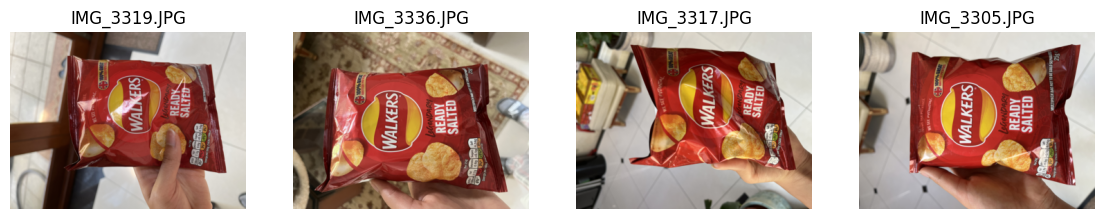

In [18]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

# custom dataset class
class SnacksDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = [
            os.path.join(image_dir, fname)
            for fname in os.listdir(image_dir)
            if fname.lower().endswith(('.png', '.jpg', '.jpeg'))
        ]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, img_path

# transformation through resizing
transform = transforms.Compose([
    transforms.Resize(256),
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],
        #std=[0.229, 0.224, 0.225])
])

# creating the dataset and dataloader
image_dir = "raw_dataset/raw_dataset"
dataset = SnacksDataset(image_dir=image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)

# function to show images
def imshow(image, ax=None, title=None, normalize=False):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))
    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)
    ax.imshow(image)
    ax.axis('off')
    if title:
        ax.set_title(title)
    return ax

# display a few images
images, paths = next(iter(dataloader))
fig, axes = plt.subplots(1, 4, figsize=(14, 4))
for i in range(len(images)):
    imshow(images[i], ax=axes[i], title=os.path.basename(paths[i]))


In [19]:
print(f"Found {len(dataset)} images in {image_dir}")

Found 40 images in raw_dataset/raw_dataset


# Transformation - Resizing

# Data Augmentation